In [1]:
pip install -q bitsandbytes sentencepiece accelerate transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.8/119.8 MB 13.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 297.4/297.4 kB 23.3 MB/s eta 0:00:00


In [2]:
checkpoint = "HuggingFaceM4/idefics-9b"

In [3]:
#import torch

# set GPGPU device
#Device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
#n_gpu = torch.cuda.device_count()
#print(torch.cuda.get_device_name(0))

In [4]:
!export PYTORCH_CUDA_ALLOC_CONF=expandable_segments:True

In [5]:
import torch

from transformers import IdeficsForVisionText2Text, AutoProcessor

processor = AutoProcessor.from_pretrained(checkpoint)
#Device = "cuda" if torch.cuda.is_available() else "cpu"

model = IdeficsForVisionText2Text.from_pretrained(checkpoint, torch_dtype=torch.bfloat16, device_map="auto")

preprocessor_config.json:   0%|          | 0.00/281 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/1.36k [00:00<?, ?B/s]

tokenizer.model:   0%|          | 0.00/500k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.84M [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/61.0 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/181 [00:00<?, ?B/s]

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


config.json:   0%|          | 0.00/1.41k [00:00<?, ?B/s]

model.safetensors.index.json:   0%|          | 0.00/99.2k [00:00<?, ?B/s]

model-00001-of-00019.safetensors:   0%|          | 0.00/2.00G [00:00<?, ?B/s]

model-00002-of-00019.safetensors:   0%|          | 0.00/1.82G [00:00<?, ?B/s]

model-00003-of-00019.safetensors:   0%|          | 0.00/1.98G [00:00<?, ?B/s]

model-00004-of-00019.safetensors:   0%|          | 0.00/1.93G [00:00<?, ?B/s]

model-00005-of-00019.safetensors:   0%|          | 0.00/1.93G [00:00<?, ?B/s]

model-00006-of-00019.safetensors:   0%|          | 0.00/1.98G [00:00<?, ?B/s]

model-00007-of-00019.safetensors:   0%|          | 0.00/1.89G [00:00<?, ?B/s]

model-00008-of-00019.safetensors:   0%|          | 0.00/1.98G [00:00<?, ?B/s]

model-00009-of-00019.safetensors:   0%|          | 0.00/1.93G [00:00<?, ?B/s]

model-00010-of-00019.safetensors:   0%|          | 0.00/1.93G [00:00<?, ?B/s]

model-00011-of-00019.safetensors:   0%|          | 0.00/1.98G [00:00<?, ?B/s]

model-00012-of-00019.safetensors:   0%|          | 0.00/1.89G [00:00<?, ?B/s]

model-00013-of-00019.safetensors:   0%|          | 0.00/1.98G [00:00<?, ?B/s]

model-00014-of-00019.safetensors:   0%|          | 0.00/1.93G [00:00<?, ?B/s]

model-00015-of-00019.safetensors:   0%|          | 0.00/1.93G [00:00<?, ?B/s]

model-00016-of-00019.safetensors:   0%|          | 0.00/1.97G [00:00<?, ?B/s]

model-00017-of-00019.safetensors:   0%|          | 0.00/1.98G [00:00<?, ?B/s]

model-00018-of-00019.safetensors:   0%|          | 0.00/1.97G [00:00<?, ?B/s]

model-00019-of-00019.safetensors:   0%|          | 0.00/705M [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/19 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/137 [00:00<?, ?B/s]

italicized text![jovyn-chamb-iWMfiInivp4-unsplash.jpg](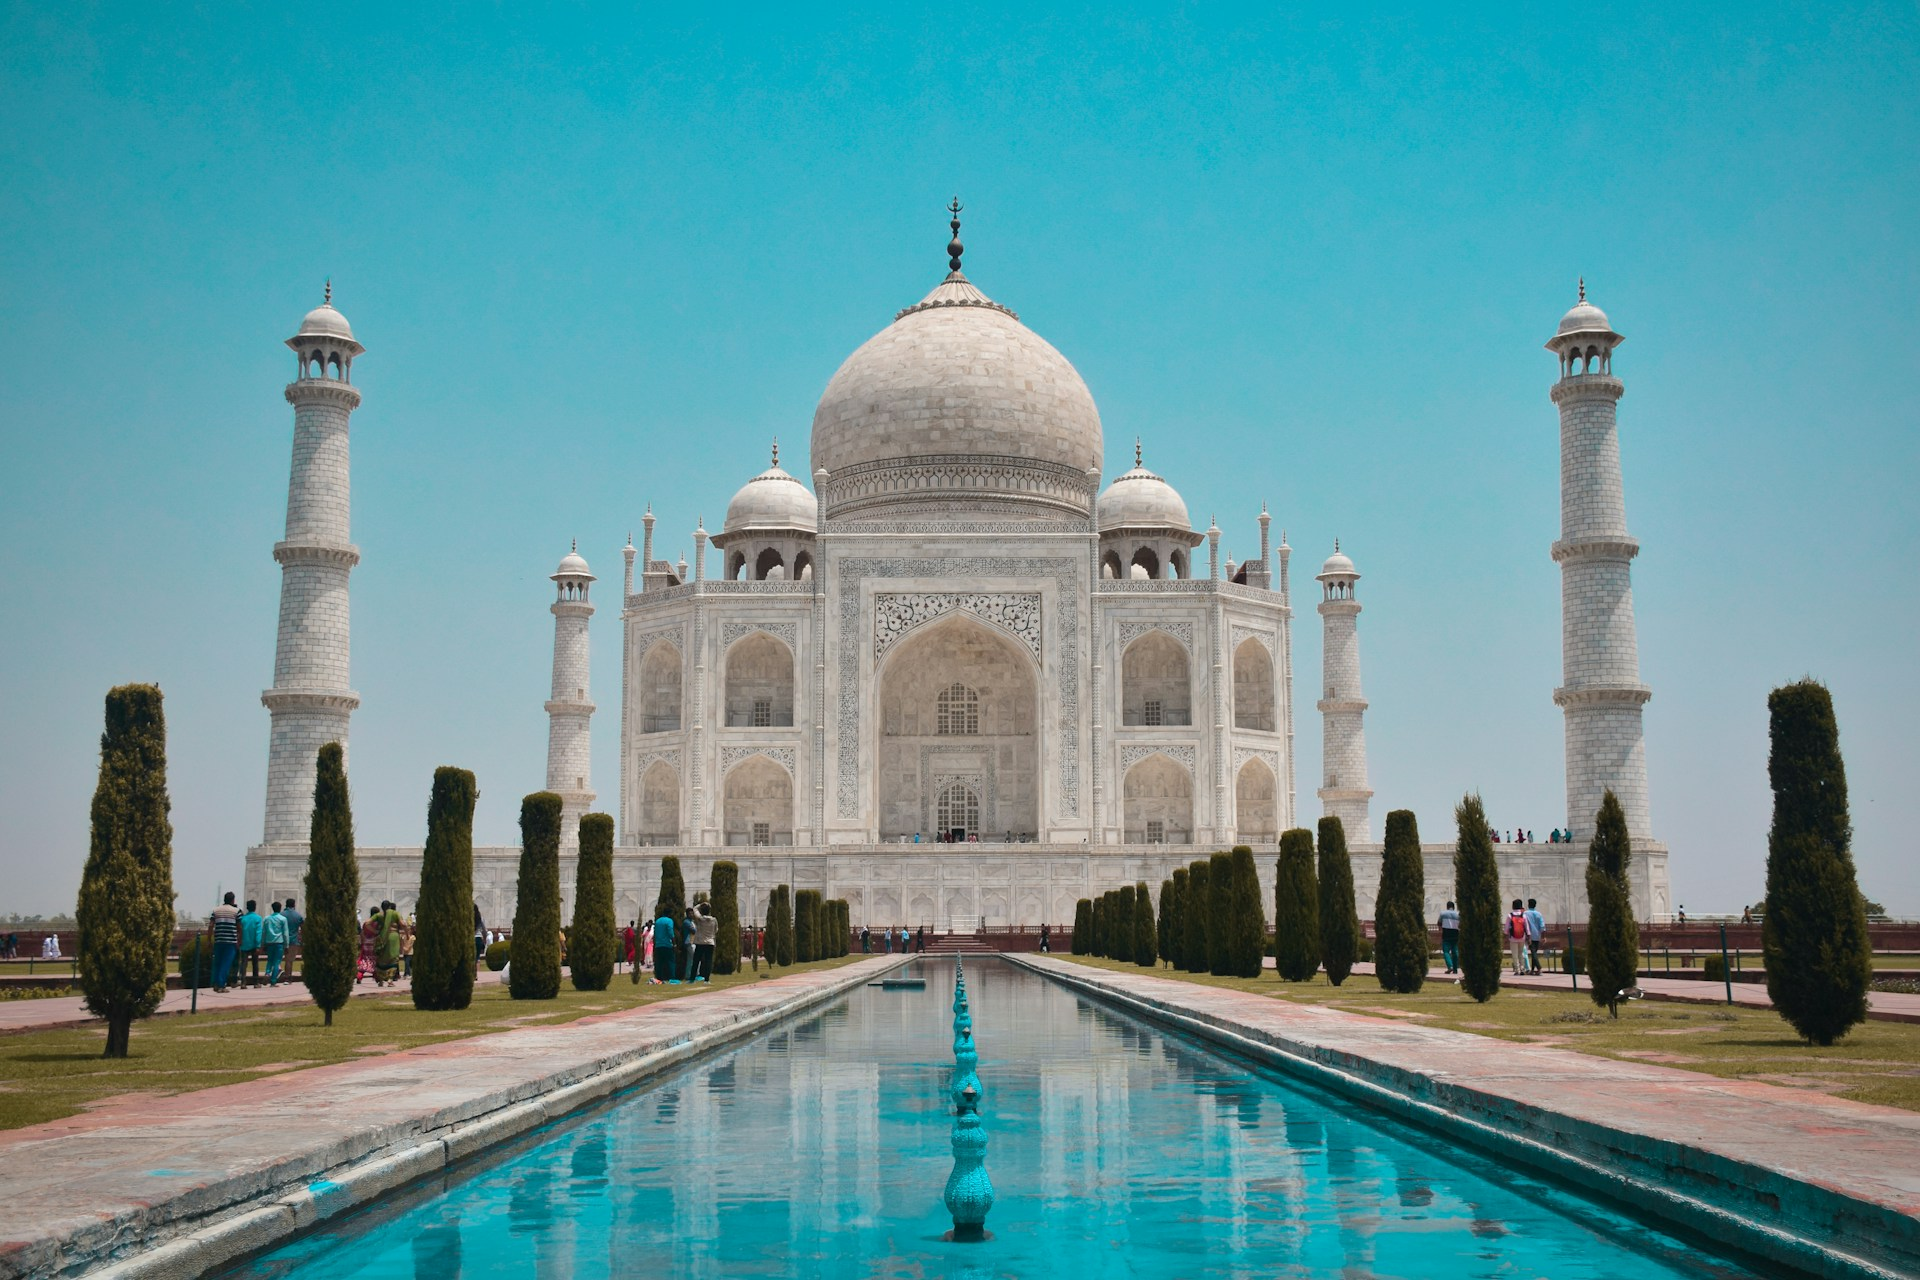![StatueOfLiberty.png](baseball.png))

In [6]:
prompt = [
           "https://unsplash.com/photos/taj-mahal-india-iWMfiInivp4"
            "This is an image of "
]

#inputs = processor(prompt, return_tensors="pt").to("cuda")
inputs = processor(prompt, return_tensors="pt")
bad_words_ids = processor.tokenizer(["<image>", "<fake_token_around_image>"], add_special_tokens=False).input_ids

generated_ids = model.generate(**inputs, max_new_tokens=52, bad_words_ids=bad_words_ids)
generated_text = processor.batch_decode(generated_ids, skip_special_tokens=True)

print(generated_text[0])


/usr/local/lib/python3.10/dist-packages/transformers/generation/utils.py:1477: UserWarning: You are calling .generate() with the `input_ids` being on a device type different than your model's device. `input_ids` is on cpu, whereas the model is on cuda. You may experience unexpected behaviors or slower generation. Please make sure that you have put `input_ids` to the correct device by calling for example input_ids = input_ids.to('cuda') before running `.generate()`.
  warnings.warn(


https://unsplash.com/photos/taj-mahal-india-iWMfiInivp4This is an image of the Taj Mahal in India. The Taj Mahal is a white marble mausoleum on the banks of the Yamuna river in Agra, India. It was built by Mughal Emperor Shah Jahan in memory of his wife


# **Few-shot Prompting**

StatueOfLiberty.png

In [7]:
prompt = ["User:",
           "https://unsplash.com/photos/taj-mahal-india-iWMfiInivp4"
           "Describe this image.\nAssistant: An image of the Taj Mahal in India. Fun fact: The Taj Mahal is a white marble mausoleum on the banks of the Yamuna river in Agra, India.\n",
           "User:",
           "https://images.unsplash.com/photo-1524099163253-32b7f0256868?ixlib=rb-4.0.3&ixid=M3wxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8fA%3D%3D&auto=format&fit=crop&w=3387&q=80",
           "Describe this image.\nAssistant:"
           ]

inputs = processor(prompt, return_tensors="pt")
bad_words_ids = processor.tokenizer(["<image>", "<fake_token_around_image>"], add_special_tokens=False).input_ids

generated_ids = model.generate(**inputs, max_new_tokens=40, bad_words_ids=bad_words_ids)
generated_text = processor.batch_decode(generated_ids, skip_special_tokens=True)
print(generated_text[0])

User:https://unsplash.com/photos/taj-mahal-india-iWMfiInivp4Describe this image.
Assistant: An image of the Taj Mahal in India. Fun fact: The Taj Mahal is a white marble mausoleum on the banks of the Yamuna river in Agra, India.
User: Describe this image.
Assistant: An image of the Statue of Liberty in New York City. Fun fact: The Statue of Liberty was a gift from France to the United States in 1886.



# **Visual Question Answering**

baseball.png

In [8]:
prompt = [
    "Instruction: Provide an answer to the question. Use the image to answer.\n",

    "https://unsplash.com/photos/man-in-black-and-white-jersey-shirt-and-white-pants-holding-baseball-bat-kuG7ivPVXNI"
    "Question: Who do you see in the picture? What sport are they playing?\n Answer:"
]

inputs = processor(prompt, return_tensors="pt")
bad_words_ids = processor.tokenizer(["<image>", "<fake_token_around_image>"], add_special_tokens=False).input_ids

generated_ids = model.generate(**inputs, max_new_tokens=30, bad_words_ids=bad_words_ids)
generated_text = processor.batch_decode(generated_ids, skip_special_tokens=True)
print(generated_text[0])

Instruction: Provide an answer to the question. Use the image to answer.
https://unsplash.com/photos/man-in-black-and-white-jersey-shirt-and-white-pants-holding-baseball-bat-kuG7ivPVXNIQuestion: Who do you see in the picture? What sport are they playing?
 Answer: I see a man in a black and white jersey shirt and white pants holding a baseball bat. I think he is playing baseball.


# **Image Classification**

vegetables.png

In [33]:
import re
categories = ['animals','vegetables', 'fruits', 'cars', 'office']
prompt = [f"Instruction: Classify the following image into a single category from the following list: {categories}.\n",
        "https://images.unsplash.com/photo-1471193945509-9ad0617afabf?ixlib=rb-4.0.3&ixid=M3wxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8fA%3D%3D&auto=format&fit=crop&w=3540&q=80"
        "Category:"
]

inputs = processor(prompt, return_tensors="pt")
bad_words_ids = processor.tokenizer(["<image>", "<fake_token_around_image>"], add_special_tokens=False).input_ids

generated_ids = model.generate(**inputs, max_new_tokens=15, bad_words_ids=bad_words_ids)
generated_text = processor.batch_decode(generated_ids, skip_special_tokens=True)

# Use a regular expression to find the text up to the closed square bracket
remaining_text = re.search(r'\.\s(.*)', generated_text[0]).group(1)

for category in categories:
    if category in remaining_text:
        print(f"Category: {category}")
        break


Category: vegetables
